● Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

● Data fetching and understand the train/val/test splits.

● Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

● Print the classification metric report (2.5 points)

● Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

● Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

● Implement batch normalization for training the neural network (2.5 points)

● Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)


In [0]:

import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import h5py

**1. Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)**

In [0]:
f = h5py.File('/content/drive/My Drive/deep learning/Residency 7/Assignments and Projects/project2Introduction_to_Neural_Networks_and_Deep_Learning/SVHN_single_grey1.h5','r')

In [5]:
for key in f.keys():
  print(key)

X_test
X_train
X_val
y_test
y_train
y_val


In [0]:
X_train = np.array(f.get('X_train'))
X_test = np.array(f.get('X_test'))
X_val = np.array(f.get('X_val'))
y_train = np.array(f.get('y_train'))
y_test = np.array(f.get('y_test'))
y_val = np.array(f.get('y_val'))

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(42000, 32, 32)
(60000, 32, 32)
(18000, 32, 32)


As we can see, the images are 32*32 pixels like MNIST dataset


In [32]:
!pip3 install imutils

In [0]:
import imutils

In [0]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #used for resizing
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os


In [12]:
!pip install Pillow


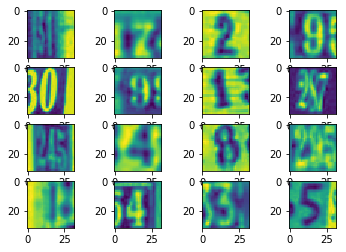

In [12]:
#code reference from https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/
from PIL import Image
from matplotlib import pyplot
#from scipy.misc import toimage
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
      for j in range(0,4):
        pyplot.subplot2grid((4,4),(i,j))
        pyplot.imshow((X[k]))
        k = k+1
    # show the plot
    pyplot.show()
 

show_imgs(X_test[:16])

These are some of the test samples. Most of them have a single number that is prominent

**2. Data fetching and understand the train/val/test splits.**

In [0]:
#code from https://www.pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/

def image_to_feature_vector(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()


In [0]:
from sklearn.preprocessing import StandardScaler

X_train_resize = list(map(image_to_feature_vector,X_train))
X_test_resize = list(map(image_to_feature_vector,X_test))
scaler = StandardScaler()
X_train_resize = scaler.fit_transform(X_train_resize)
X_test_resize = scaler.fit_transform(X_test_resize)

In [15]:
X_train_resize[1].shape

(1024,)

In [16]:
X_train_resize[1]

array([-0.53872753, -0.5384548 , -0.51422949, ..., -0.76750369,
       -0.74415328, -0.69312858])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


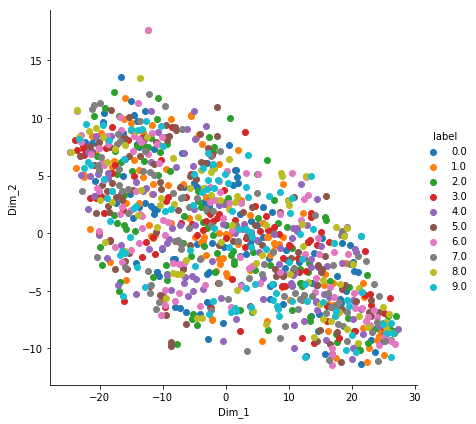

In [19]:
# TSNE

from sklearn.manifold import TSNE
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data = X_train_resize[0:1000, :]
labels = y_train[0:1000]

model = TSNE(n_components=2, random_state=0, perplexity = 50, n_iter = 500)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()


  For the first 1000 points we could see that TSNE can kind of segregate the classes to some extent and help in visualisation. The data looks scattered and no clear grouping can be found

**3. Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)**

Before starting with KNN, there is a need to reduce the dimensionality of the dataset. Cause 1024 dimensions is huge to handle.

In [0]:
#using PCA to reduce dimensionality
scaler = StandardScaler()
eda_scaled = scaler.fit_transform(X_train_resize)
eda_scaled_t = scaler.fit_transform(X_test_resize)


In [21]:
X_train_resize.shape

(42000, 1024)

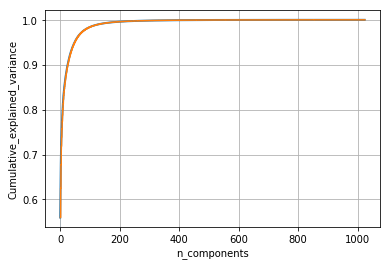

In [22]:

#pca using sklearn
# PCA for dimensionality redcution (non-visualization)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.n_components = 1024
pca_data = pca.fit_transform(eda_scaled)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.bar(range(1, 1025), percentage_var_explained, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, 1025), cum_var_explained, where='mid', label = 'Cumulative explained variance')
plt.show()



# If we take 100-dimensions, approx. 90% of variance is expalined.

In [0]:
#pca done manually

def data_manipul(data):
  cov_matrix = np.cov(eda_scaled.T)
  e_vals, e_vecs = np.linalg.eig(cov_matrix)
  tot = sum(e_vals)
  var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
  cum_var_exp = np.cumsum(var_exp)
  print("Cumulative Variance Explained", cum_var_exp)
  # Ploting 
  plt.figure(figsize=(10 , 5))
  plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
  plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
  plt.ylabel('Explained Variance Ratio')
  plt.xlabel('Principal Components')
  plt.legend(loc = 'best')
  plt.tight_layout()
  plt.show()

Cumulative Variance Explained [ 55.98192155  62.46838823  67.7484441  ...  99.99999041  99.99999535
 100.        ]


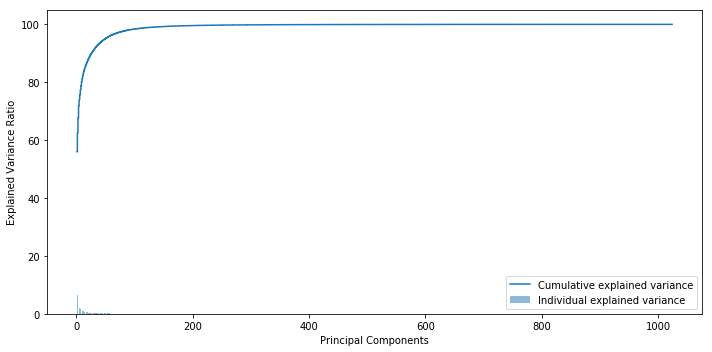

In [24]:
data_manipul(eda_scaled)


In [0]:

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(eda_scaled)

In [0]:
principalComponents_t = pca.transform(eda_scaled_t)

In [27]:
#KNN with different neighbors. Here in the output K refers to the number of neighbors taken and the accuracy for each case is calculated

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracies = []
for i in range(30,100,10):
  model = KNeighborsClassifier(n_neighbors=i, weights ='distance', p=1)
  model.fit(principalComponents, y_train)
  # evaluate the model and update the accuracies list
  score = model.score(principalComponents_t, y_test)
  print("k=%d, accuracy=%.2f%%" % (i, score * 100))
  accuracies.append(score)



k=30, accuracy=61.17%
k=40, accuracy=61.52%
k=50, accuracy=61.59%
k=60, accuracy=61.71%
k=70, accuracy=61.88%
k=80, accuracy=61.88%
k=90, accuracy=61.51%


In [0]:
principalComponents_t = pca.transform(eda_scaled_t)

In [0]:
#As k = 70 gives highest accuracy take that as the input to classifier
model = KNeighborsClassifier(n_neighbors=70, weights = 'distance', p=1, algorithm = 'ball_tree' )
model.fit(principalComponents, y_train)
# evaluate the model and update the accuracies list
y_pred = model.predict(principalComponents_t)

**4. Print the classification metric report (2.5 points)**


In [30]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
score = model.score(principalComponents_t, y_test)
print('Accuracy Score', score)


              precision    recall  f1-score   support

           0       0.55      0.75      0.64      1814
           1       0.52      0.78      0.62      1828
           2       0.76      0.59      0.66      1803
           3       0.59      0.50      0.54      1719
           4       0.71      0.73      0.72      1812
           5       0.62      0.53      0.57      1768
           6       0.62      0.51      0.56      1832
           7       0.74      0.69      0.72      1808
           8       0.57      0.52      0.55      1812
           9       0.61      0.58      0.59      1804

    accuracy                           0.62     18000
   macro avg       0.63      0.62      0.62     18000
weighted avg       0.63      0.62      0.62     18000

Accuracy Score 0.6187777777777778


**5. Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations)**


In [0]:

from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Activation, Dropout, Flatten, Reshape, BatchNormalization
from keras import backend as K
K.set_image_dim_ordering('th')

In [0]:
X_train =np.array(X_train)
X_test = np.array(X_test)

In [44]:
X_train.shape

(42000, 32, 32)

In [45]:
#X_train_dnn, dnn stands for deep neural network
X_train_dnn = X_train.reshape(X_train.shape[0],1,32,32).astype('float32')

X_train_dnn.shape

(42000, 1, 32, 32)

In [0]:
X_test_dnn = X_test.reshape(X_test.shape[0], 1,32,32).astype('float32')
X_train_dnn /= 255
X_test_dnn /= 255

In [0]:
#y_train is in the form of a 1-D array of a single class, so we need to convert each value to 10 classes with the winner class as 1 and others as 0

import keras

y_train_dnn = keras.utils.to_categorical(y_train,num_classes=10)
y_test_dnn = keras.utils.to_categorical(y_test,num_classes=10)

In [48]:
#Define SGD optimizer Model
    model = Sequential()
    
    # 1st Conv Layer
    model.add(Convolution2D(32,(3, 3), input_shape=(1,32,32), data_format='channels_first'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
    #model.add(Dropout(0.2))


    # 2nd Conv Layer
    model.add(Convolution2D(64,(3, 3), data_format='channels_first'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
    #model.add(Dropout(0.2))

    
     # 3rd Conv Layer
    model.add(Convolution2D(64,(3, 3), data_format='channels_first'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
    #model.add(Dropout(0.2))
    
     
    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
        
    # Prediction Layer
    model.add(Dense(10, activation = 'softmax'))
    
    # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model.fit(X_train_dnn, y_train_dnn, batch_size=32, nb_epoch=20, 
              validation_data=(X_test_dnn, y_test_dnn), callbacks = callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 7s 160us/step - loss: 2.3014 - acc: 0.1143 - val_loss: 2.3003 - val_acc: 0.0987
Epoch 2/20
42000/42000 [==============================] - 6s 147us/step - loss: 2.2983 - acc: 0.1340 - val_loss: 2.2959 - val_acc: 0.1437
Epoch 3/20
42000/42000 [==============================] - 6s 148us/step - loss: 2.2883 - acc: 0.1794 - val_loss: 2.2725 - val_acc: 0.2146
Epoch 4/20
42000/42000 [==============================] - 6s 147us/step - loss: 2.1669 - acc: 0.2424 - val_loss: 1.9092 - val_acc: 0.3414
Epoch 5/20
42000/42000 [==============================] - 6s 147us/step - loss: 1.3700 - acc: 0.5590 - val_loss: 0.9824 - val_acc: 0.6942
Epoch 6/20
42000/42000 [==============================] - 6s 148us/step - loss: 0.8294 - acc: 0.7517 - val_loss: 0.7444 - val_acc: 0.7798
Epoch 7/20
42000/42000 [==============================] - 6s 148us/step - loss: 0.6654 - acc: 0.8050 - val_loss: 0.6243 - 

**7. Implement batch normalization for training the neural network (2.5 points)**

Adding another conv layer + "Adam Optimizer" + Batch normalization for each hidden layer, the accuracy improves to 93%.

In [49]:

# Define Model
    model_cnn = Sequential()
    
    # 1st Conv Layer
    model_cnn.add(Convolution2D(32,(3, 3), input_shape=(1,32,32), data_format='channels_first'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Activation('relu'))
    
    # Dropout
    model_cnn.add(Dropout(0.2))


    # 2nd Conv Layer
    model_cnn.add(Convolution2D(64,(3, 3), data_format='channels_first'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Activation('relu'))
    # Max Pooling
    model_cnn.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
    model_cnn.add(Dropout(0.2))

    
     # 3rd Conv Layer
    model_cnn.add(Convolution2D(64,(3, 3), data_format='channels_first'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Activation('relu'))
    # Max Pooling
    model_cnn.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
    model_cnn.add(Dropout(0.2))
    
     
     # 4th Conv Layer
    model_cnn.add(Convolution2D(64,(3, 3), data_format='channels_first'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Activation('relu'))
    # Max Pooling
    #model_cnn.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
    model_cnn.add(Dropout(0.25))
    
    # Fully Connected Layer
    model_cnn.add(Flatten())
    model_cnn.add(Dense(128, activation='relu'))
    model_cnn.add(Dense(256, activation='relu'))
        
    # Prediction Layer
    model_cnn.add(Dense(10, activation = 'softmax'))
    
    # Loss and Optimizer
    model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model_cnn.fit(X_train_dnn, y_train_dnn, batch_size=32, nb_epoch=20, 
              validation_data=(X_test_dnn, y_test_dnn), callbacks = callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 15s 351us/step - loss: 1.9178 - acc: 0.2891 - val_loss: 0.8837 - val_acc: 0.7255
Epoch 2/20
42000/42000 [==============================] - 14s 322us/step - loss: 0.6621 - acc: 0.7938 - val_loss: 0.4347 - val_acc: 0.8688
Epoch 3/20
42000/42000 [==============================] - 14s 322us/step - loss: 0.4513 - acc: 0.8604 - val_loss: 0.3638 - val_acc: 0.8912
Epoch 4/20
42000/42000 [==============================] - 14s 323us/step - loss: 0.3752 - acc: 0.8843 - val_loss: 0.3353 - val_acc: 0.8993
Epoch 5/20
42000/42000 [==============================] - 14s 322us/step - loss: 0.3347 - acc: 0.8979 - val_loss: 0.2997 - val_acc: 0.9103
Epoch 6/20
42000/42000 [==============================] - 14s 324us/step - loss: 0.3079 - acc: 0.9059 - val_loss: 0.2839 - val_acc: 0.9161
Epoch 7/20
42000/42000 [==============================] - 14s 323us/step - loss: 0.2818 - acc: 0.9141 - val_loss: 0.

In [50]:
y_pred_classes = model_cnn.predict_classes(X_test_dnn)
print(y_pred_classes)

[1 7 2 ... 7 8 2]


In [51]:
y_pred = model_cnn.predict(X_test_dnn)
print(y_pred)

[[1.60197113e-02 8.44523609e-01 1.43853773e-04 ... 1.33709831e-03
  2.48588528e-02 1.41100995e-02]
 [4.77987250e-08 2.98315445e-06 1.98689857e-04 ... 9.99753177e-01
  8.63855298e-09 4.35764559e-05]
 [2.31630736e-07 3.19156834e-06 9.98365462e-01 ... 3.72722894e-07
  4.97071960e-06 3.91125248e-08]
 ...
 [1.78330826e-08 1.09151433e-05 1.62025955e-07 ... 9.99988794e-01
  2.67036038e-09 2.10200000e-08]
 [1.16952276e-03 7.06841995e-04 8.97256890e-04 ... 6.95619441e-04
  4.57724303e-01 2.36038327e-01]
 [9.31099891e-08 1.45686363e-09 9.99964952e-01 ... 3.31307783e-05
  1.44772415e-07 3.76973219e-07]]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1814
           1       0.93      0.92      0.92      1828
           2       0.96      0.93      0.95      1803
           3       0.90      0.91      0.91      1719
           4       0.94      0.95      0.95      1812
           5       0.93      0.92      0.92      1768
           6       0.92      0.93      0.92      1832
           7       0.94      0.95      0.94      1808
           8       0.93      0.93      0.93      1812
           9       0.95      0.92      0.93      1804

    accuracy                           0.93     18000
   macro avg       0.93      0.93      0.93     18000
weighted avg       0.93      0.93      0.93     18000



**Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)**

In [57]:
from sklearn.preprocessing import label_binarize
# 10 classes to classify
n_classes = 10
# Binarize the output
y_train_bin = label_binarize(y_train_dnn, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_test_bin = label_binarize(y_test_dnn, classes = [0,1,2,3,4,5,6,7,8,9])
y_pred_bin = label_binarize(y_pred_classes, classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_train_bin.shape[1]
print(n_classes)
print(y_train_bin)
print(y_test_bin[:,1])

10
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 0 ... 0 0 0]


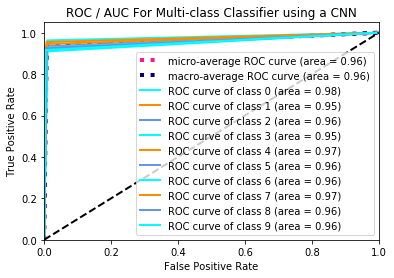

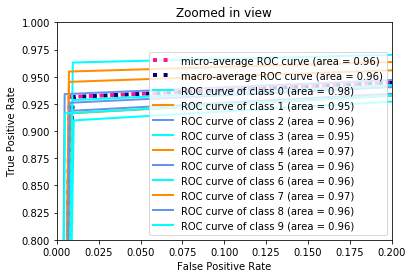

In [55]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
#DNN ROC Curve
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC / AUC For Multi-class Classifier using a CNN')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zoomed in view')
plt.legend(loc="lower right")
plt.show()

From above two graphs for KNN vs CNN , which looks at the ROC at different thresholds of the classifier, we can see that CNN clearly outperforms the KNN Model. The micro / macro average for ROC and AUC for KNN is ~79 while for the CNN it is ~96. We can see that the CNN is better than KNN classwise too, with the AUC for each class atleast 10 points higher for CNN compared to KNN.

The overall accuracy of the CNN model is 93% vs 61.85% for KNN.

So CNN is a better model for this given dataset compared to KNN because

i) CNN works well for highly spatially correlated features. Eg. Image processing when compared to traditional ML Models. Each convolutional kernel, takes a feature and transforms it into another feature through progressive hierarchical learning. This means that increased weightage is given to features near to each other. This is not the case for KNN, where equal weightage is given to any feature. This is especially useful in use-cases such as image processing, where pixels near to each other usually contain more information than pixels away from each other.

ii) CNN also works better on image processing, due to translation covariant features. Due to this, CNN is able to provide better generalization and performance. This means that, CNN not only works on the entire image as a feature map but on portions of the image too. Which means CNN is able to recognize a feature no matter where in the receptive field that feature is located. This convolution plus the pooling operation helps build tolerance to severe distortion or change in camera angle / perspective, or even incomplete images. KNN will fail in this scenario, because it works on simple distance based learning (eg. Euclidean) which does not recognize shift in feature space.

iii) The next tradeoff, is on the time taken for each iteration for KNN. If the number of features are small and heterogenous, then KNN is a better model, but for a complex dataspace like image, with a huge number of dimensions ( homogenous highly correlated features) KNN takes a long time to execute, due to the distance calculation being done for all possible combination of data points. Here CNN is easily the better model.

iv) The underlying algorithm for CNN is the gradient descent, which means each layer feeds from a layer below so this builds up hierarchical features. Thus they are very adaptive learners to the problem at hand. On the other hand KNN do not build hierarchical features that are derived via progressive learning, rather just empirical distance metrics between feature combinations are used to make predictions.

​
